<a href="https://colab.research.google.com/github/Nmn99/Advance-Regression/blob/main/insurance_pricing_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insurance Pricing Forecast Using XGBoost Regressor**


## **Project Overview**

Insurance companies cover expenses the policyholder incurs from damages to health or property policies commonly offered: medical bills, house, motor vehicle, and fire insurance, and financial losses such as a loss of income against a fee or premium paid by the client. Traditional approaches to premium calculation require a lot of time-consuming human labor and are getting more complicated daily to capture the increasingly complex interactions in the data.
Insurance firms should normally collect a higher premium than the amount given to the insured individual if that person files a valid claim to generate a profit. Since profitability is the fundamental factor that helps the insurance firm survive, they need a mechanism for reliably forecasting healthcare expenses.

Hence, our goal is to build a machine learning model that helps establish the rates by predicting the charges or payouts done by the health insurance firm to maintain profitability.

In this project, we will primarily focus on building an XGBoost Regressor to determine healthcare expenses based on features such as age, BMI, smoking, etc. We will also learn about categorical correlation, build a linear regression model as a baseline and compare it with the results of the XGBoost regressor. We will eventually learn how to communicate technical results to stakeholders who are not technical.


![image](https://images.unsplash.com/photo-1637763723578-79a4ca9225f7?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1171&q=80)

### **Introduction**

#### **Problem statement**

To make a profit, insurance companies should generally collect a higher premium than the amount paid to the insured person if they raise a valid claim. This being the case, insurance companies require a method of accurately predicting health care costs.

**Therefore our goal is to accurately predict health care costs using the given set of features.**

#### **Why machine learning?**

Since there are multiple features in the dataset, it would be difficult and time consuming to manually find the relationship between these and the health care costs. Instead, we will apply machine learning techniques to achieve this goal.

#### **How will we evaluate our models?**

Before we begin a machine learning project, we should define the metric we will use to evaluate the performance of our model.

There are many different metrics that can be used to evaluate a regression model (see [here](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b)) - in this case, we'll use the **Root Mean Square Error (RMSE)** as it penalises large prediction errors. However, we'll also calculate other performance metrics to give us a more intuitive understanding of our model's performance.

## **Learning Outcomes**


* Understanding the insurance pricing problem statement
* Exploratory Data Analysis on Categorical and Continuous Data
* Univariate Data Analysis
* Bivariate Data Analysis
* Understand Correlation Analysis
* Categorical Correlation with Chi-squared
* Correlation between Categorical and Target Variables with ANOVA
* Label Encoding for Categorical Variables
* Understanding Linear Regression Assumptions
* Implementing Linear Regression
* Validating Linear Regression Assumptions
* Understanding XGBoost Regressor
* Implementing XGBoost Regressor
* Building pipelines with Sklearn’s Pipeline operator
* Implementing BayesSearchCV for XGBoost Hyperparameter Optimization
* Evaluating Models with Regression Metrics - RMSE
* Presenting Non-Technical Metrics for Stakeholders


## **Approach**

1. Exploratory Data Analysis (EDA)
4. Build and evaluate a baseline linear model
    1. Linear regression assumptions
    2. Data preprocessing
    3. Model training
    4. Model evaluation
5. Improve on the baseline linear model
    1. Introduction to a non-linear model - XGBoost
    2. Data preprocessing
    3. Using Sklearn's `Pipeline` to optimise the model training process
    4. Model evaluation
    5. Comparison to the baseline model
6. Presenting the results to non-technical stakeholders

## **Important Libraries**

* **Pandas**: pandas is a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool built on top of the Python programming language. Refer to [documentation](https://pandas.pydata.org/) for more information.

* **NumPy**: The fundamental package for scientific computing with Python. Fast and versatile, the NumPy vectorization, indexing, and broadcasting concepts are the de-facto standards of array computing today. NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more. Refer to [documentation](https://numpy.org/) for more information. pandas and NumPy are together used for most of the data analysis and manipulation in Python.

* **Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Refer to [documentation](https://matplotlib.org/) for more information.


* **scikit-learn**: Simple and efficient tools for predictive data analysis
accessible to everybody and reusable in various contexts.
It is built on NumPy, SciPy, and matplotlib to support machine learning in Python. Refer to [documentation](https://scikit-learn.org/stable/) for more information.

* **statsmodels**: statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration. Refer to [documentation](https://www.statsmodels.org/stable/index.html) for more information.

* **plotly**: Plotly's Python graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts. Refer to [documentation](https://plotly.com/python/) for more information.

* **scikit-optimize**: Scikit optimize enables sequential model based optimization in Python. Refer to [documentation](https://scikit-optimize.github.io/stable/) for more information.

* **category_encoders**: A set of scikit-learn-style transformers for encoding categorical variables into numeric with different techniques. Refer to [documentation](https://contrib.scikit-learn.org/category_encoders/) for more information.

* **xgboost**: XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. Refer to [documentation](https://xgboost.readthedocs.io/en/stable/) for more information.





In [66]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Import Libraries**

Before we start, let's first import the necessary third party libraries:

In [41]:
# import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import sys
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import RFE


## **Exploratory Data Analysis (EDA)**

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = pd.read_csv('/content/drive/MyDrive/Insurance data/data/insurance.csv')

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So we have three numeric features (`age`, `bmi` and `children`) and three categorical features (`sex`, `smoker` and `region`).

**NOTE:** there are no null values in any of the columns, which means we won't need to impute values in the **Data preprocessing** step. This, however, is usually a step that you'll need to consider when building a machine learning model.

The target (i.e. the variable that we want to predict) is the `charges` column, so let's split the dataset into features (`X`) and the target (`y`):

In [43]:
target = 'charges'
X = data.drop(target, axis=1)
y = data[target]

Check dataframe shapes:

In [44]:
X.shape, y.shape

((1338, 6), (1338,))

### **Distributions**

Let's now look at the distribution of each feature by plotting a histogram for each:

**EDA Toolkit**

In [45]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from itertools import combinations, product
import pandas as pd
import numpy as np
import plotly.express as px


def plot_histograms(X, height=1200):
    fig = make_subplots(rows=X.shape[1], cols=1)
    for i, col in enumerate(X.columns):
        fig.add_trace(
            go.Histogram(
                x=X[col],
                name=col,
            ),
            row=i+1,
            col=1
        )
        fig.update_xaxes(
            title_text=col,
            row=i+1,
            col=1
        )
        fig.update_yaxes(
            title_text='count',
            row=i+1,
            col=1
        )
    fig.update_layout(height=height)
    fig.show()


def plot_univariate_numeric(X, y):
    fig = make_subplots(rows=X.shape[1], cols=1)
    for i, col in enumerate(X.columns):
        fig.add_trace(
            go.Scatter(
                x=X[col],
                y=y,
                name=col,
                mode='markers'
            ),
            row=i+1,
            col=1
        )
        fig.update_xaxes(
            title_text=col,
            row=i+1,
            col=1
        )
        fig.update_yaxes(
            title_text='charges',
            row=i+1,
            col=1
        )
    fig.update_layout(
        height=1200
    )
    fig.show()


def plot_univariate_categorical(X, y):
    fig = make_subplots(rows=X.shape[1], cols=1)
    for i, col in enumerate(X.columns):
        fig.add_trace(
            go.Box(
                x=X[col],
                y=y,
                name=col,
            ),
            row=i+1,
            col=1
        )
        fig.update_xaxes(
            title_text=col,
            row=i+1,
            col=1
        )
        fig.update_yaxes(
            title_text='charges',
            row=i+1,
            col=1
        )
    fig.update_layout(height=1200)
    fig.show()


def plot_heatmap(X, y, bins=10):
    data = pd.concat([X, y], axis=1)
    for num_col in X.select_dtypes(include=np.number):
        if X[num_col].nunique() < bins:
            continue
        else:
            data[num_col] = pd.cut(data[num_col], bins=bins)
    col_pairs = list(combinations(X.columns, 2))
    for col1, col2 in col_pairs:
        col_pair_y_mean = data.groupby(
            [col1, col2]
        )[y.name].mean().reset_index()
        col_pair_y_mean = col_pair_y_mean.pivot(
            index=col1, columns=col2, values=y.name
        )
        col_pair_y_mean.sort_index(ascending=False, inplace=True)
        col_pair_y_mean.index = col_pair_y_mean.index.astype(str)
        col_pair_y_mean.columns = col_pair_y_mean.columns.astype(str)
        fig = px.imshow(col_pair_y_mean)
        fig.show()


def plot_paired_boxplots(X, y):
    col_pairs = list(combinations(X.columns, 2))
    fig = make_subplots(rows=len(col_pairs), cols=1)
    for i, (col1, col2) in enumerate(col_pairs):
        paired_cat = col1 + '=' + X[col1] + ', ' + col2 + '=' + X[col2]
        fig.add_trace(
            go.Box(
                x=paired_cat,
                y=y,
                name=f'{col1} & {col2}'
            ),
            row=i+1,
            col=1
        )
        fig.update_xaxes(
            title_text=f'{col1} & {col2}',
            row=i+1,
            col=1,
            categoryorder='array',
            categoryarray=sorted(paired_cat.unique())
        )
        fig.update_yaxes(
            title_text='charges',
            row=i+1,
            col=1
        )
    fig.update_layout(
        height=1800
    )
    fig.show()


def plot_paired_scatterplots(X, y):
    data = pd.concat([X, y], axis=1)
    num_cols = X.select_dtypes(np.number).columns
    cat_cols = X.select_dtypes(object).columns
    col_pairs = list(product(num_cols, cat_cols))
    fig = make_subplots(rows=len(col_pairs), cols=1)
    j = 1
    for i, (col1, col2) in enumerate(col_pairs):
        for col2_val in X[col2].unique():
            mask = X[col2] == col2_val
            X_ = X[mask]
            y_ = y[mask]
            fig.add_trace(
                go.Scatter(
                    # data_frame=data,
                    x=X_[col1],
                    y=y_,
                    # marker_color=X_[col2],
                    name=col2_val,
                    mode='markers',
                    legendgroup=j
                ),
                row=i+1,
                col=1
            )
        fig.update_xaxes(title_text=col1, row=i+1, col=1)
        fig.update_yaxes(title_text=y.name, row=i+1, col=1)
        j += 1
    fig.update_layout(
        height=4800,
        legend_tracegroupgap=485,
    )
    fig.show()


def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    fig = px.histogram(residuals)
    fig.show()


def plot_pearson_wrt_target(X, y):
    data = pd.concat([X, y], axis=1)
    data_corr = data.select_dtypes(np.number).corr()
    data_corr.index.name = 'features'
    data_corr = data_corr.reset_index()
    data_corr = data_corr[data_corr['features'] != y.name]
    fig = px.bar(
        data_frame=data_corr.reset_index(),
        x='features',
        y='charges'
    )
    fig.update_yaxes(title='correlation')
    fig.show()

In [46]:
# Plots histogram for each feature using plotly library
plot_histograms(X)

Points to note regarding the distribution of each feature:

* `age` - Approximately uniformly distributed.
* `sex` - Approximately equal volume in each category.
* `bmi` - Approximately normally distributed.
* `children` - Right skewed (i.e. higher volume in lower range).
* `smoker` - Significantly more volume in the `no` category vs the `yes` category.
* `region` - Approximately equal volume in each category.

We can also observe the distribution of the target:

In [47]:
# Plots histogram for target using plotly library
plot_histograms(pd.DataFrame(y), height=300)

The distribution is right skewed (i.e. higher volume in the lower range).

### **Univariate analysis (with respect to the target)**

Let's now apply univariate analysis with respect to the target. This means that we take each feature and see how it relates to the target.

The way in which we do this depends on whether the feature is numeric or categorical. For numeric features, we'll use a scatterplot; for categorical features, we'll use boxplots.

#### Numeric features

In [48]:
plot_univariate_numeric(
    X.select_dtypes(include=np.number),
    y
)

Points to note regarding each feature:

* `age` - As `age` increases, `charges` also tends to increase (although there is a large variance in `charges` for a given `age`).
* `bmi` - There is no clear relationship, although there seems to be a group of individuals with `bmi` > 30 that have `charges` > 30k. This group may become more apparent when we carry out our bivariate analysis later.
* `children` - No clear relationship (although `charges` seems to decrease as `children` increases). **Since there are only 6 unique values for this feature, let's try treating it as a categorical feature for the purposes of univariate analysis.**

#### Categorical features

In [49]:
plot_univariate_categorical(
    X[['sex', 'smoker', 'region', 'children']],
    y
)

Points to note regarding each feature:

* `sex` - No significant differences in `charges` between the categories.
* `smoker` - `charges` for `smoker` == 'yes' are generally much higher than when `smoker` == 'no'.
* `region` - No significant differences in `charges` between the categories.
* `children` - No significant differences in `charges` between the categories (`children` >= 4 are skewed towards lower `charges`, but this is likely due to the low volumes in those categories - see the **Distributions** section).

### **Bivariate analysis (with respect to the target)**

#### **Numeric pairs**

##### **Correlation Heatmap**



In [51]:
plot_heatmap(
    X[['age', 'bmi', 'children']],
    y,
    bins=10
)


No additional insight can be gained from these plots that we haven't already obtained from the univariate analysis.

#### **Categorical pairs**

**Box Plots**




In [52]:
plot_paired_boxplots(
    X[['sex', 'smoker', 'region']],
    y
)

Points to note regarding these feature pairs:

* `sex`-`smoker` - The median `charges` is higher for males who smoke compared to females who smoke (36k vs 29k)
* `smoker`-`region` - The median `charges` is higher for smokers in the southwest and southeast vs the northeast and northwest (35k and 37k vs 28k and 27k)

#### **Numeric-categorical pairs**

In [53]:
plot_paired_scatterplots(X, y)

There are two pieces of insight from these graphs:

* `age`-`smoker` - There is a group in the bottom left hand quadrant of the chart (where `age` < 50 and `smoker` = 'no') where all beneficiaries have health care costs below 10k (which is relatively small compared to the rest of the population).
* `bmi`-`smoker` - There is a group in the top right hand quadrant of the chart (where `bmi` > 30 and `smoker` = 'yes') where all beneficiaries have health care costs above 30k (which is relatively large compared to the rest of the population).

### **Collinearity (between features)**

#### **Numeric features**

First, let's use a pairplot to see how each pair of numeric features relate to one another:

In [54]:
px.scatter_matrix(
    X.select_dtypes(include=np.number)
)

There doesn't look like there's much correlation between any of the numeric features. To be sure, let's calculate and plot the **Pearson's correlation matrix**:

**Correlation**

Correlation coefficient is used to measure the strength of relationship between two variables. It indicates that as the value of one variable changes the other variable changes in a specific direction with some magnitude. There are various ways to find correlation between two variables, one of which is Pearson correlation coefficient.
It measures the linear relationship between two continuous variables.

Let's say $x$ and $y$ are two continuous variables, the Pearson correlation coefficient between them can be found by the following formula.


$$r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$

where $x_i$ and $y_i$ represents the $i^{th}$ value of the variables.
The value of $r$ ranges between $-1$ and $+1$.

Their strength of relationship is measured by the absolute value of coefficient, whereas the sign of the coefficient indicates the direction of the relationship.





### **Graphs of Different Correlation Coefficients**
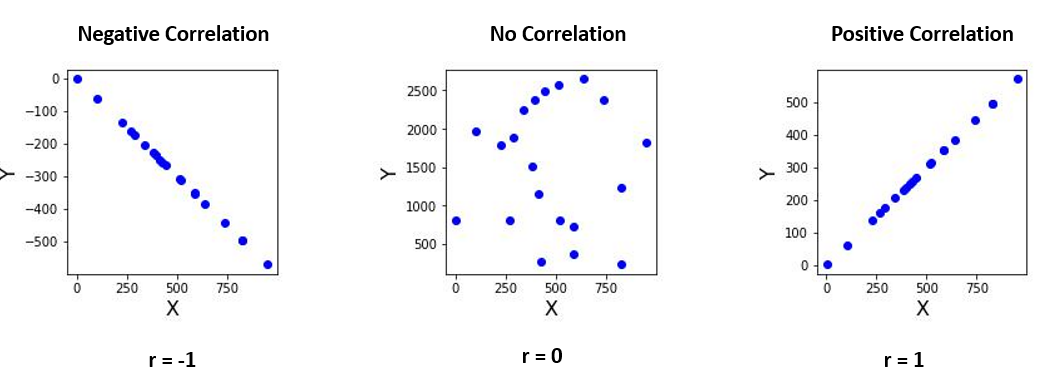

1. $r = -1$ indicates a perfect negative relationship between the variables

2. $r = 0$ indicates no relationship between the variables

3. $r = 1$ indicates a perfect positive relationship between the variables



In [55]:
px.imshow(X.select_dtypes(include=np.number).corr())

This suggests there is very little correlation between the numeric features - the highest being a Pearson's correlation of 0.11.

#### **Categorical features**

 **Chi Squared Test**


In [56]:
X_chi2 = chi2(X.select_dtypes(object))

In [57]:
X_chi2

,column1,column2,chi_squared,p_value,dof
0,sex,smoker,7.392911,0.006548,1
1,sex,region,0.435137,0.932892,3
2,smoker,region,7.343478,0.061720,3


Since there are only three different categorical feature pairs, we won't plot the results.

We can use the p-value (which is derived from the $\chi^2$ result and the degrees of freedom) to test how likely the observed distribution (for each feature pair) happened due to chance. For example, a p-value of 0.5 means that there is a 50% probability of observing the distribution by chance.

A threshold of < 0.05 is widely accepted for rejecting the null-hypothesis (that the features are independent) since this means that there is only a 5% probability of observing the distribution by chance.

The only feature pair with a p-value less than this threshold is `sex` and `smoker`, which means it's likely that these features are correlated:

In [58]:
X_chi2[X_chi2['p_value'] < 0.05]

,column1,column2,chi_squared,p_value,dof
0,sex,smoker,7.392911,0.006548,1


#### **Numeric-categorical feature pairs**

**ANOVA**



For numeric-categorical feature pairs, we'll use an ANOVA test. ANOVA stands for Analysis of Variance - it helps us to understand if there are statistically significant differences between the means of independent groups.



ANOVA is an abbreviation for Analysis of Variances, which evaluates the differences between group means. It's a statistical hypothesis test that looks to see if the means of at least two populations differ. To run ANOVA, we require at least one continuous variable and one categorical variable that separates your data into comparison groups. The term "analysis of variances" refers to how the test uses variances to determine whether the means are different.


ANOVA compares the variance of group means to the variance of the groups. This procedure establishes if the groups are part of a bigger population or if they are separate populations with different means.

Despite the fact that it analyses variations, it tests means. One way ANOVA is the most basic sort of ANOVA. This method is a generalisation of t tests that can be used to compare more than two groups.

The null hypothesis is that all groups have same mean and the alternate hypothesis is that atleast one group has different mean.

Watch full explanation for [Introduction to ANOVA](https://www.projectpro.io/project/hackerday-project/project-title/polynomial%20regression%20model%20in%20python%20from%20scratch#sub-hackerday-video-18) here.

First, we calculate the $F$ values (the ratio of the between- and within-group mean squares) and p-values:

In [59]:
X_anova = anova(X)

In [60]:
X_anova

,num_column,cat_column,f_stat,p_value
0,age,sex,0.581369,4.459107e-01
1,age,smoker,0.836777,3.604853e-01
2,age,region,0.079782,9.709891e-01
3,bmi,sex,2.878970,8.997637e-02
4,bmi,smoker,0.018792,8.909850e-01
5,bmi,region,39.495057,1.881839e-24
6,children,sex,0.393659,5.304898e-01
7,children,smoker,0.078664,7.791596e-01
8,children,region,0.717493,5.415543e-01


Similar to the $\chi^2$ test above, we can use the p-value to test how likely the observed distribution (for each feature pair) happened due to chance. We will again apply the threshold of < 0.05 isfor rejecting the null-hypothesis (that the features are independent).

The only feature pair with a p-value less than this threshold is `bmi` and `region`, which means it's likely that these features are correlated:

In [61]:
X_anova[X_anova['p_value'] < 0.05]

,num_column,cat_column,f_stat,p_value
5,bmi,region,39.495057,1.881839e-24


### **Correlation (with respect to the target)**

Now we will calculate the correlation between the features and the target. This will be useful when it comes to building our baseline linear model.

We can apply the same techniques that we used when calculating collinearity between features.

#### **Numeric features (with respect to the target)**

Here, we'll calculate the Pearson's Correlation between each numeric feature and the target:

In [62]:
plot_pearson_wrt_target(X, y)

The `children` feature has a very low correlation with respect to the target.

#### **Categorical features (with respect to the target)**

Here, we'll apply the ANOVA test. Note that since we're only interested in comparing each categorical feature to the target, we filter out the results of all other numeric features:

In [64]:
data_anova = anova(data) # Use data as it contains the target

anova_wrt_target = data_anova[data_anova['num_column']=='charges']

In [65]:
anova_wrt_target

,num_column,cat_column,f_stat,p_value
9,charges,sex,4.399702,3.613272e-02
10,charges,smoker,2177.614868,8.271436e-283
11,charges,region,2.969627,3.089336e-02


All p-values are < 0.05, which means that the differences observed in the `charges` column when comparing the categories within a categorical variable are statistically significant. **Note however that this doesn't measure the magnitude of the differences observed.**

---

## **Build and evaluate a baseline linear model**

### **Multiple Linear Regression**



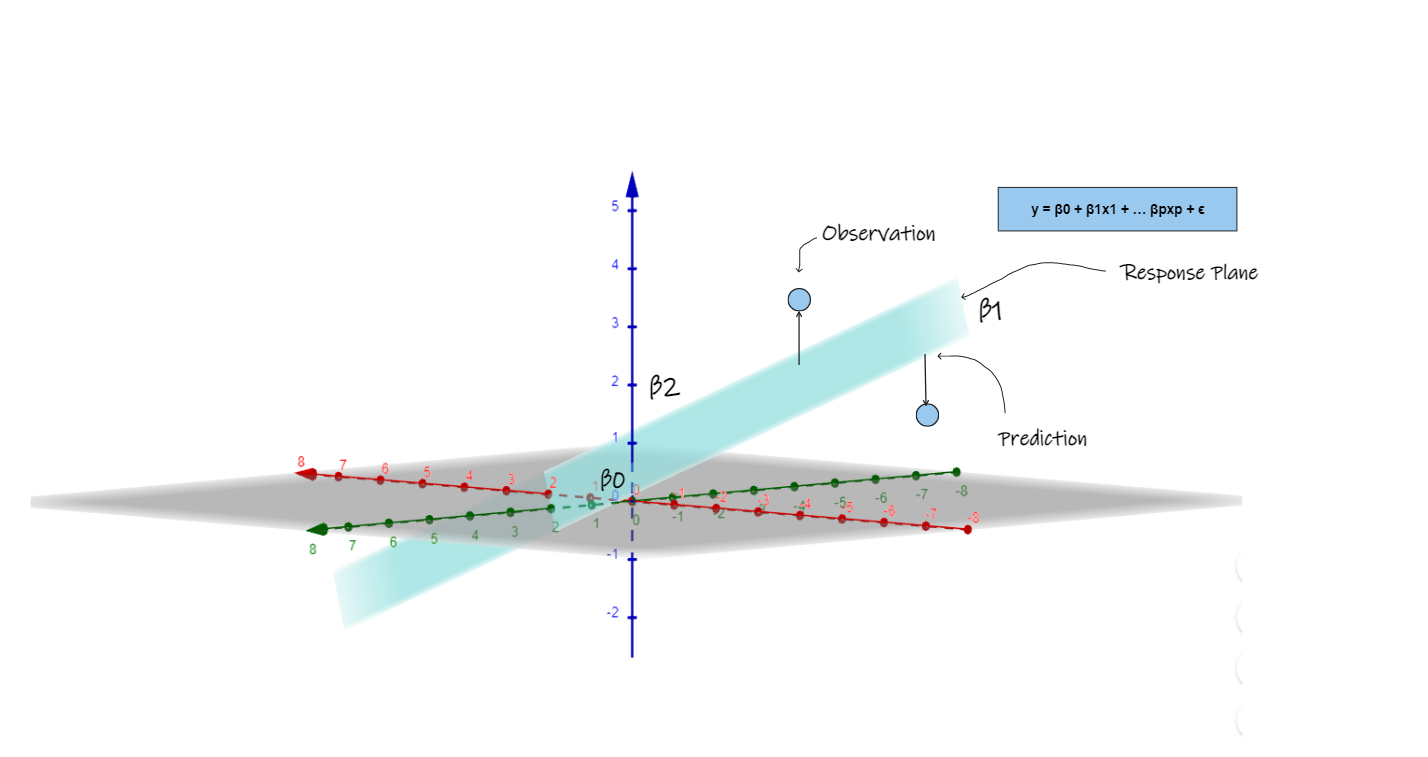

### **Linear regression assumptions**

### **Data preprocessing**

#### **Train/test split**



It's always best practise to split your dataset into a training set (which we use for training any data processing steps and the model itself) and a test set (which we only use for model evaluation).

**We can then be more confident in the performance of our model on unseen data.**

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)

#### **Remove unnecessary columns**

After our EDA, we concluded that the `children` feature is not strongly correlated to `charges`. This violates Assumption 2 of a linear regression model, so we should remove this feature from our training set.

Also, our $\chi^2$ test suggested the `sex` feature is correlated to the `smoker` feature, and our ANOVA test suggested the `region` feature is correlated to the `bmi` feature. This violates Assumption 3 of a linear regression model, so we should remove these features from our training set. We will remove the `sex` and `region` features, since these had weaker predictive power with respect to the target.

In [67]:
cols_to_drop = [
    'children',
    'region',
    'sex'
]
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)

#### **Encoding**

Now, we need to encode our categorical features - this means transforming them into numeric features so the model can interpret them.

There are many encoding methods, but in this example we'll use One Hot Encoding, which creates a boolean column for each category in each categorical feature.



In [69]:
from category_encoders import OneHotEncoder
ohe = OneHotEncoder(use_cat_names=True)
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)


Since the `smoker` feature only has two categories, we can drop the encoded `smoker_no` column, since it doesn't provide any additional information:

In [70]:
cols_to_drop = ['smoker_no']
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)

#### **Transformation of the target**

In [71]:
pt = PowerTransformer(method='yeo-johnson')
y_train_t = pt.fit_transform(y_train.values.reshape(-1, 1))[:, 0]
y_test_t = pt.transform(y_test.values.reshape(-1, 1))[:, 0]

Now let's quickly check whether this has had the desired effect (on both training and test sets):

<AxesSubplot: >

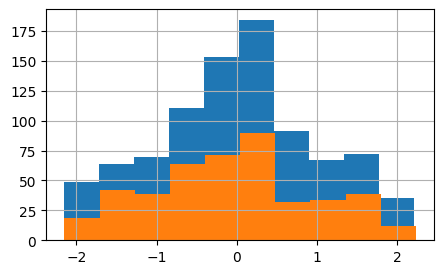

In [72]:
pd.Series(y_train_t).hist(figsize=(5, 3))
pd.Series(y_test_t).hist(figsize=(5, 3))

### **Model training**

In [73]:
sample_weight = y_train / y_train.min()

Finally, we can train our linear regression model by passing it our training set and sample weights:

In [74]:
lr = LinearRegression()
lr.fit(
    X_train,
    y_train_t,
    sample_weight=sample_weight
)

LinearRegression()

### **Model evaluation**

Now that we've trained our model, we can use it to generate predictions on both our training and test sets:

In [75]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

Remember that the model was trained based on a transformed version of the target. Therefore we need to perform the inverse **Yeo-Johnson** transform to convert the model predictions to the original format of the target:

In [77]:
y_pred_train = pt.inverse_transform(y_pred_train.reshape(-1, 1))[:, 0]

y_pred_test = pt.inverse_transform(y_pred_test.reshape(-1, 1))[:, 0]

With our predictions, we can evaluate our model:

In [78]:
base_perf_train = calc_model_performance(y_train, y_pred_train)

In [82]:
base_perf_train

{'Root Mean Squared Error': 4.063051426848795e+58,
 'Mean Squared Error': 1.6508386897218032e+117,
 'Mean Absolute Error': 4.411172219101064e+57,
 'Mean Absolute Percentage Error': 9.273760341517103e+52,
 'R Squared': -1.1268085590508943e+109}

In [83]:
base_perf_test = calc_model_performance(y_test, y_pred_test)

In [84]:
base_perf_test

{'Root Mean Squared Error': 5752.477398059848,
 'Mean Squared Error': 33090996.215189405,
 'Mean Absolute Error': 4534.422635060566,
 'Mean Absolute Percentage Error': 0.7565371511851344,
 'R Squared': 0.7741917232715532}

**So our evaluation metric for the model (RMSE) is ~5964 on the training set and ~5752 on the test set.**

### **Check normality of residuals**

In [85]:
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

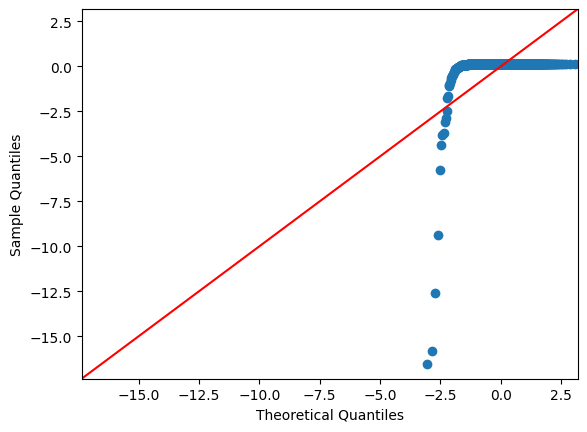

In [86]:
fig = sm.qqplot(
    residuals_train,
    fit=True,
    line='45'
)

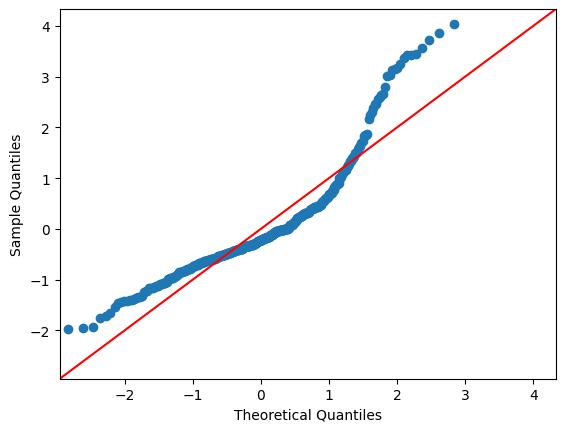

In [87]:
fig = sm.qqplot(
    residuals_test,
    fit=True,
    line='45'
)

In [88]:
plot_residuals(y_true=y_train, y_pred=y_pred_train)

Our residuals are not perfectly normally distributed, but are pretty close!

### **Check homoscedasticity**

In [89]:
px.scatter(x=y_train, y=residuals_train)

In [90]:
px.scatter(x=y_test, y=residuals_test)

Our model exhibits significant heteroscedasticity (i.e. the variance of the residuals is not homogeneous with respect to the target). Since this is a baseline model, we will not spend additional time attempting to improve this.

---

## **Improve on the baseline linear model**

### **Introduction to a non-linear model - XGBoost**

#### **Train/test split**

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)

#### **Encoding**

We still need to encode the categorical features, so let's apply One Hot Encoding again:

In [92]:
ohe = OneHotEncoder(use_cat_names=True)
X_train = ohe.fit_transform(X_train)

X_test = ohe.transform(X_test)

### **Using Sklearn's `Pipeline` to optimise the model training process**

In [93]:
rfe = RFE(estimator=XGBRegressor())
xgb = XGBRegressor()

Now we create our pipeline by specifying the list of sequential processes we want to run. The output of each step is passed to the next, with the final step being an estimator (i.e. model). In this case, we want to:

1. Apply feature selection (via RFE)
2. Train the XGBoost regressor

We do this by creating a list of tuples, where the first element of each tuple is a label for the step, and the second element is the class to run:

In [94]:
steps = [
    ('rfe', rfe),
    ('xgb', xgb)
]

Then we pass this to the `Pipeline` class:

In [95]:
pipe = Pipeline(steps)

When the `fit` method of the pipeline is called, it will pass the features and target to the RFE `fit_transform` method. The output of this will be passed to the `fit` method of the XGBoost regressor.

Now that we have our pipeline defined, we can set up our `BayesSearchCV` class to optimise the parameters of the pipeline. Firstly, we need to define the parameters we want to optimise and the space over which the `BayesSearchCV` should search. Note that since we're using a pipeline, we need to define the parameters related to each step by adding a prefix, which is the step's label and two underscores (e.g. `xgb__` for the XGBoost step):

In [96]:
num_features = X_train.shape[1]
search_spaces = {
    'rfe__n_features_to_select': Integer(1, num_features), # Num features returned by RFE
    'xgb__n_estimators': Integer(1, 500), # Num trees built by XGBoost
    'xgb__max_depth': Integer(2, 8), # Max depth of trees built by XGBoost
    'xgb__reg_lambda': Integer(1, 200), # Regularisation term (lambda) used in XGBoost
    'xgb__learning_rate': Real(0, 1), # Learning rate used in XGBoost
    'xgb__gamma': Real(0, 2000) # Gamma used in XGBoost
}

Once our search space for each parameter is defined, we pass this, along with our pipeline, to the `BayesSearchCV` class. This works by:
1. Creating a cross validation dataset of $n$ folds, where each fold has the same number of observations. For example, for 3 folds, the original dataset is randomly split into 3 subsets.
2. The following steps are then applied across all folds:
    1. Create a sub-training set comprising of $n$-1 folds and a sub-validation set comprising of the remaining fold.
    2. Train the pipeline using a given set of parameters on the sub-training set.
    3. Use this trained pipeline to make predictions on the sub-validation set and calculate the scoring metric (i.e. the RMSE in this case).
3. Calculate the mean of the scoring metric across all sub-validation sets.
4. The algorithm then uses a bayesian approach to select the next set of parameters which will maximise the mean scoring metric across all sub-validation sets.
5. Steps 2-4 are repeated until a threshold is reached (see the `n_iter` parameter in the `BayesSearchCV` class).

**BayesSearchCV**

This method use stepwise Bayesian Optimization to investigate the most promising problem-space hyperparameters.
In large problem spaces, Bayesian Optimization determines the minimum to an objective function. Under the hood, it employs Gaussian Process regression on the objective function to do this. In our example, the objective function is to find the optimal model output given the model parameters we specify.
The Bayesian Optimization approach has the advantage of providing a significantly greater range of possible values because it automatically explores the most promising regions and discards the less promising ones over time.

A simple grid-search would take a lot of time to exhaust all possible values.
Because we move much more efficiently, we can create a much larger playing field.

Bayesian Optimization keeps track of previous evaluation results, which they use to build a probabilistic model mapping hyperparameters to the probability of a score on the objective function. It is basically finding out the most promising hyperparameters by building a probability model of the objective function.

P = (score | hyperparameters)

This probability function works as a "surrogate" for objective functions. Hyperparameters are tested on this and those who stand out are then tested on the trtue objective function which would a function that minimizes error. The results then updates the surrogate function again and in this way, bayesian optimization selects parameters in an informed manner.

In [98]:
xgb_bs_cv = BayesSearchCV(
    estimator=pipe, # Pipeline
    search_spaces=search_spaces, # Search spaces
    scoring='neg_root_mean_squared_error', # BayesSearchCV tries to maximise scoring metric, so negative RMSE used
    n_iter=75, # Num of optimisation iterations
    cv=3, # Number of folds
    n_jobs=-1, # Uses all available cores to compute
    verbose=1, # Show progress
    random_state=0 # Ensures reproducible results
)


Now we can initiate the parameter optimisation process using our training set:

In [100]:
import numpy as np

# ... your existing code ...

# Before calling xgb_bs_cv.fit, add this workaround:
np.int = int  # or np.int64 or np.int32, depending on your desired precision

# ... rest of your code ...

xgb_bs_cv.fit(
    X_train,
    y_train,
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('rfe',
                                         RFE(estimator=XGBRegressor(base_score=None,
                                                                    booster=None,
                                                                    callbacks=None,
                                                                    colsample_bylevel=None,
                                                                    colsample_bynode=None,
                                                                    colsample_bytree=None,
                                                                    early_stopping_rounds=None,
                                                                    enable_categorical=False,
                                                                    eval_metric=None,
                                                                    feature_types=None,
                                                                    gamma=None,
                                                                    gpu_id=None,
                                                                    grow_policy=None,
                                                                    importance_type=None,
                                                                    interaction...
                             'xgb__gamma': Real(low=0, high=2000, prior='uniform', transform='normalize'),
                             'xgb__learning_rate': Real(low=0, high=1, prior='uniform', transform='normalize'),
                             'xgb__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'xgb__n_estimators': Integer(low=1, high=500, prior='uniform', transform='normalize'),
                             'xgb__reg_lambda': Integer(low=1, high=200, prior='uniform', transform='normalize')},
              verbose=1)

### **Model evaluation**

Let's first look at how each parameter set performed across each fold. Each record in the dataset corresponds to a parameter set that was tested. We rank by `rank_test_score` to ensure the best performing parameter set is shown at the top:

In [101]:
cv_results = pd.DataFrame(xgb_bs_cv.cv_results_).sort_values('rank_test_score')

In [102]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfe__n_features_to_select,param_xgb__gamma,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__n_estimators,param_xgb__reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
41,0.268364,0.059394,0.007239,0.001046,10,1482.343103,0.452712,3,29,94,"{'rfe__n_features_to_select': 10, 'xgb__gamma'...",-4045.510055,-4884.220156,-4825.651304,-4585.127172,382.315360,1
71,0.283296,0.078437,0.010278,0.003547,11,1096.463233,0.734343,3,27,165,"{'rfe__n_features_to_select': 11, 'xgb__gamma'...",-4187.179207,-4906.238273,-4835.833621,-4643.083700,323.651957,2
23,0.384045,0.079109,0.006146,0.000859,9,1219.387756,0.697336,3,27,94,"{'rfe__n_features_to_select': 9, 'xgb__gamma':...",-4181.634968,-4863.629566,-4887.231633,-4644.165389,327.200303,3
74,0.146216,0.026287,0.006005,0.001226,11,1101.216541,0.682062,3,27,75,"{'rfe__n_features_to_select': 11, 'xgb__gamma'...",-4123.716044,-4943.875322,-4872.378402,-4646.656589,370.925027,4
25,0.325636,0.101202,0.005758,0.000672,10,1228.752176,0.534869,3,27,44,"{'rfe__n_features_to_select': 10, 'xgb__gamma'...",-4153.985862,-4939.785062,-4881.912747,-4658.561224,357.570061,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,1.054010,0.292262,0.011432,0.003949,7,518.244865,0.724903,2,1,50,"{'rfe__n_features_to_select': 7, 'xgb__gamma':...",-11053.578385,-9677.752768,-10559.360466,-10430.230540,569.051805,71
15,0.860230,0.031957,0.009823,0.005479,5,1023.325592,0.562071,3,1,57,"{'rfe__n_features_to_select': 5, 'xgb__gamma':...",-12911.609265,-11325.899537,-12244.854336,-12160.787713,650.086780,72
10,0.142469,0.031485,0.005810,0.000934,11,711.798963,0.308168,2,1,187,"{'rfe__n_features_to_select': 11, 'xgb__gamma'...",-16874.786608,-14897.826640,-15726.175854,-15832.929701,810.612923,73
62,0.815678,0.184157,0.006002,0.001186,5,1770.633657,0.0,2,120,1,"{'rfe__n_features_to_select': 5, 'xgb__gamma':...",-19016.356974,-17163.287836,-17897.134903,-18025.593238,761.945958,74


Now, let's generate predictions on both our training and test sets using the model trained with our best performing parameters:

In [103]:
y_pred_train_xgb = xgb_bs_cv.predict(X_train)
y_pred_test_xgb = xgb_bs_cv.predict(X_test)

With our predictions, we can evaluate our model:

In [104]:
xgb_perf_train = calc_model_performance(y_train, y_pred_train_xgb)

In [105]:
xgb_perf_train

{'Root Mean Squared Error': 4143.531144783492,
 'Mean Squared Error': 17168850.347790793,
 'Mean Absolute Error': 2324.4966239914816,
 'Mean Absolute Percentage Error': 0.2715118988239929,
 'R Squared': 0.8828110363453212}

In [106]:
xgb_perf_test = calc_model_performance(y_test, y_pred_test_xgb)

In [107]:
xgb_perf_test

{'Root Mean Squared Error': 4564.672556440718,
 'Mean Squared Error': 20836235.54752304,
 'Mean Absolute Error': 2574.816518182922,
 'Mean Absolute Percentage Error': 0.2966458405343096,
 'R Squared': 0.8578164763642111}

## **Comparison to the baseline model**

#### Compare evaluation metrics

Let's first compare the evaluation metrics we calculated for each model:

In [108]:
perf_comp_train = compare_model_performance(base_perf_train, xgb_perf_train)
perf_comp_test = compare_model_performance(base_perf_test, xgb_perf_test)

In [109]:
perf_comp_train

,base,new,abs_improvement,perc_improvement
Root Mean Squared Error,4.063051e+58,4143.53,-4.063051e+58,-100.0
Mean Squared Error,1.650839e+117,17168850.35,-1.650839e+117,-100.0
Mean Absolute Error,4.411172e+57,2324.50,-4.411172e+57,-100.0
Mean Absolute Percentage Error,9.273760e+52,0.27,-9.273760e+52,-100.0
R Squared,-1.126809e+109,0.88,1.126809e+109,-100.0


In [110]:
perf_comp_test

,base,new,abs_improvement,perc_improvement
Root Mean Squared Error,5752.48,4564.67,-1187.81,-20.65
Mean Squared Error,33090996.22,20836235.55,-12254760.67,-37.03
Mean Absolute Error,4534.42,2574.82,-1959.60,-43.22
Mean Absolute Percentage Error,0.76,0.30,-0.46,-60.53
R Squared,0.77,0.86,0.09,11.69


**We can observe a significant decrease the errors and an increase in the $R^2$ value for the XGBoost model.**

**Most importantly, the RMSE (our model evaluation metric that we defined at the beginning of the exercise) has decreased by ~22% on the test set!**

---

## **Presenting the results to non-technical stakeholders**

In [111]:
calc_preds_in_residual_range(
    y_true=y_test,
    y_pred=y_pred_test_xgb,
    range_=2000
)

63.80090497737556

In [113]:
calc_preds_in_residual_perc_range(
    y_true=y_test,
    y_pred=y_pred_test_xgb,
    perc_range=20
)


54.97737556561086